## XG_BOOST_Regressor  with Hyper parameter tuning

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading combine data csv
combine_data= pd.read_csv(r'C:\Users\Unify\Desktop\janibasha\Complete Data Science life cycle\Data_collection\Html_scraping_data\Real_combine.csv')
combine_data

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,1,26.7,33.0,20.0,1012.4,60.0,5.1,4.4,13.0,284.795833
1,3,29.1,35.0,20.5,1011.9,49.0,5.8,5.2,14.8,219.720833
2,5,28.4,36.0,21.0,1011.3,46.0,5.3,5.7,11.1,182.187500
3,7,25.9,32.0,20.0,1011.8,56.0,6.1,6.9,11.1,154.037500
4,9,24.8,31.1,20.6,1013.6,58.0,4.8,8.3,11.1,223.208333
...,...,...,...,...,...,...,...,...,...,...
638,1277,28.5,33.4,20.9,1012.6,59.0,5.3,6.3,14.8,185.500000
639,1279,24.9,33.2,14.8,1011.5,48.0,4.2,4.6,13.0,166.875000
640,1281,26.4,32.0,20.9,1011.2,70.0,3.9,6.7,9.4,200.333333
641,1283,20.8,25.0,14.5,1016.8,78.0,4.7,5.9,11.1,349.291667


In [3]:
# droping unwanted column from dataframe

combine_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
combine_data

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,26.7,33.0,20.0,1012.4,60.0,5.1,4.4,13.0,284.795833
1,29.1,35.0,20.5,1011.9,49.0,5.8,5.2,14.8,219.720833
2,28.4,36.0,21.0,1011.3,46.0,5.3,5.7,11.1,182.187500
3,25.9,32.0,20.0,1011.8,56.0,6.1,6.9,11.1,154.037500
4,24.8,31.1,20.6,1013.6,58.0,4.8,8.3,11.1,223.208333
...,...,...,...,...,...,...,...,...,...
638,28.5,33.4,20.9,1012.6,59.0,5.3,6.3,14.8,185.500000
639,24.9,33.2,14.8,1011.5,48.0,4.2,4.6,13.0,166.875000
640,26.4,32.0,20.9,1011.2,70.0,3.9,6.7,9.4,200.333333
641,20.8,25.0,14.5,1016.8,78.0,4.7,5.9,11.1,349.291667


In [5]:
# combine data top 5 rows
combine_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,26.7,33.0,20.0,1012.4,60.0,5.1,4.4,13.0,284.795833
1,29.1,35.0,20.5,1011.9,49.0,5.8,5.2,14.8,219.720833
2,28.4,36.0,21.0,1011.3,46.0,5.3,5.7,11.1,182.187500
3,25.9,32.0,20.0,1011.8,56.0,6.1,6.9,11.1,154.037500
4,24.8,31.1,20.6,1013.6,58.0,4.8,8.3,11.1,223.208333


In [6]:
# combine data bottom 5 features
combine_data.tail()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
638,28.5,33.4,20.9,1012.6,59.0,5.3,6.3,14.8,185.500000
639,24.9,33.2,14.8,1011.5,48.0,4.2,4.6,13.0,166.875000
640,26.4,32.0,20.9,1011.2,70.0,3.9,6.7,9.4,200.333333
641,20.8,25.0,14.5,1016.8,78.0,4.7,5.9,11.1,349.291667
642,23.3,28.0,14.9,1014.0,71.0,4.5,3.0,9.4,310.250000


In [7]:
# To get statistical data 
combine_data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,27.609953,33.974028,20.669207,1009.030327,51.716952,5.057698,7.686936,16.139036,111.378895
std,3.816030,4.189773,4.314514,4.705001,16.665038,0.727143,3.973736,6.915630,82.144946
min,18.900000,22.000000,9.000000,998.000000,15.000000,2.300000,1.100000,5.400000,0.000000
25%,24.900000,31.000000,17.950000,1005.100000,38.000000,4.700000,5.000000,11.100000,46.916667
50%,27.000000,33.000000,21.400000,1009.400000,51.000000,5.000000,6.900000,14.800000,89.875000
75%,29.800000,37.000000,23.700000,1013.100000,64.000000,5.500000,9.400000,18.300000,159.854167
max,37.700000,45.000000,31.200000,1019.200000,95.000000,7.700000,25.600000,77.800000,404.500000


In [8]:
# Now we need check null values 

combine_data.isnull()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
638,False,False,False,False,False,False,False,False,False
639,False,False,False,False,False,False,False,False,False
640,False,False,False,False,False,False,False,False,False
641,False,False,False,False,False,False,False,False,False


In [9]:
combine_data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

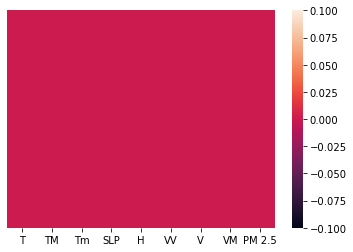

In [10]:
# we can also visualize null values with seaborn
import seaborn as sns
sns.heatmap(combine_data.isnull(),yticklabels=False)

If we observe the heat map there is no null values

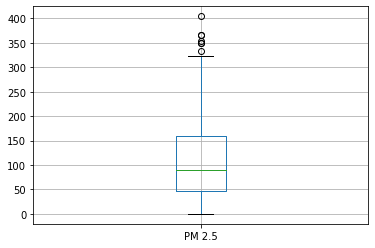

In [11]:
# To check outliers 
import matplotlib.pyplot as plt

combine_data.boxplot(column='PM 2.5')
plt.show()

Few outliers present in the PM 2.5 feature(dependent feature)

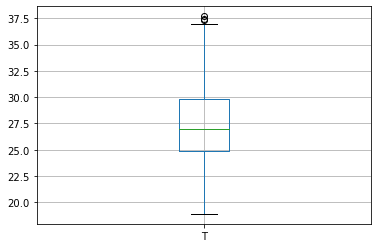

In [12]:
combine_data.boxplot(column='T')
plt.show()

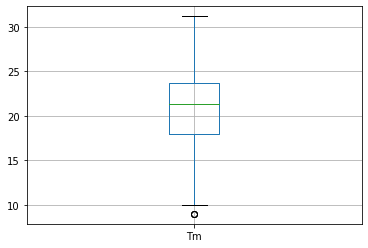

In [13]:
combine_data.boxplot(column='Tm')
plt.show()

If we observe the above box-plots very very less outliers in independent features

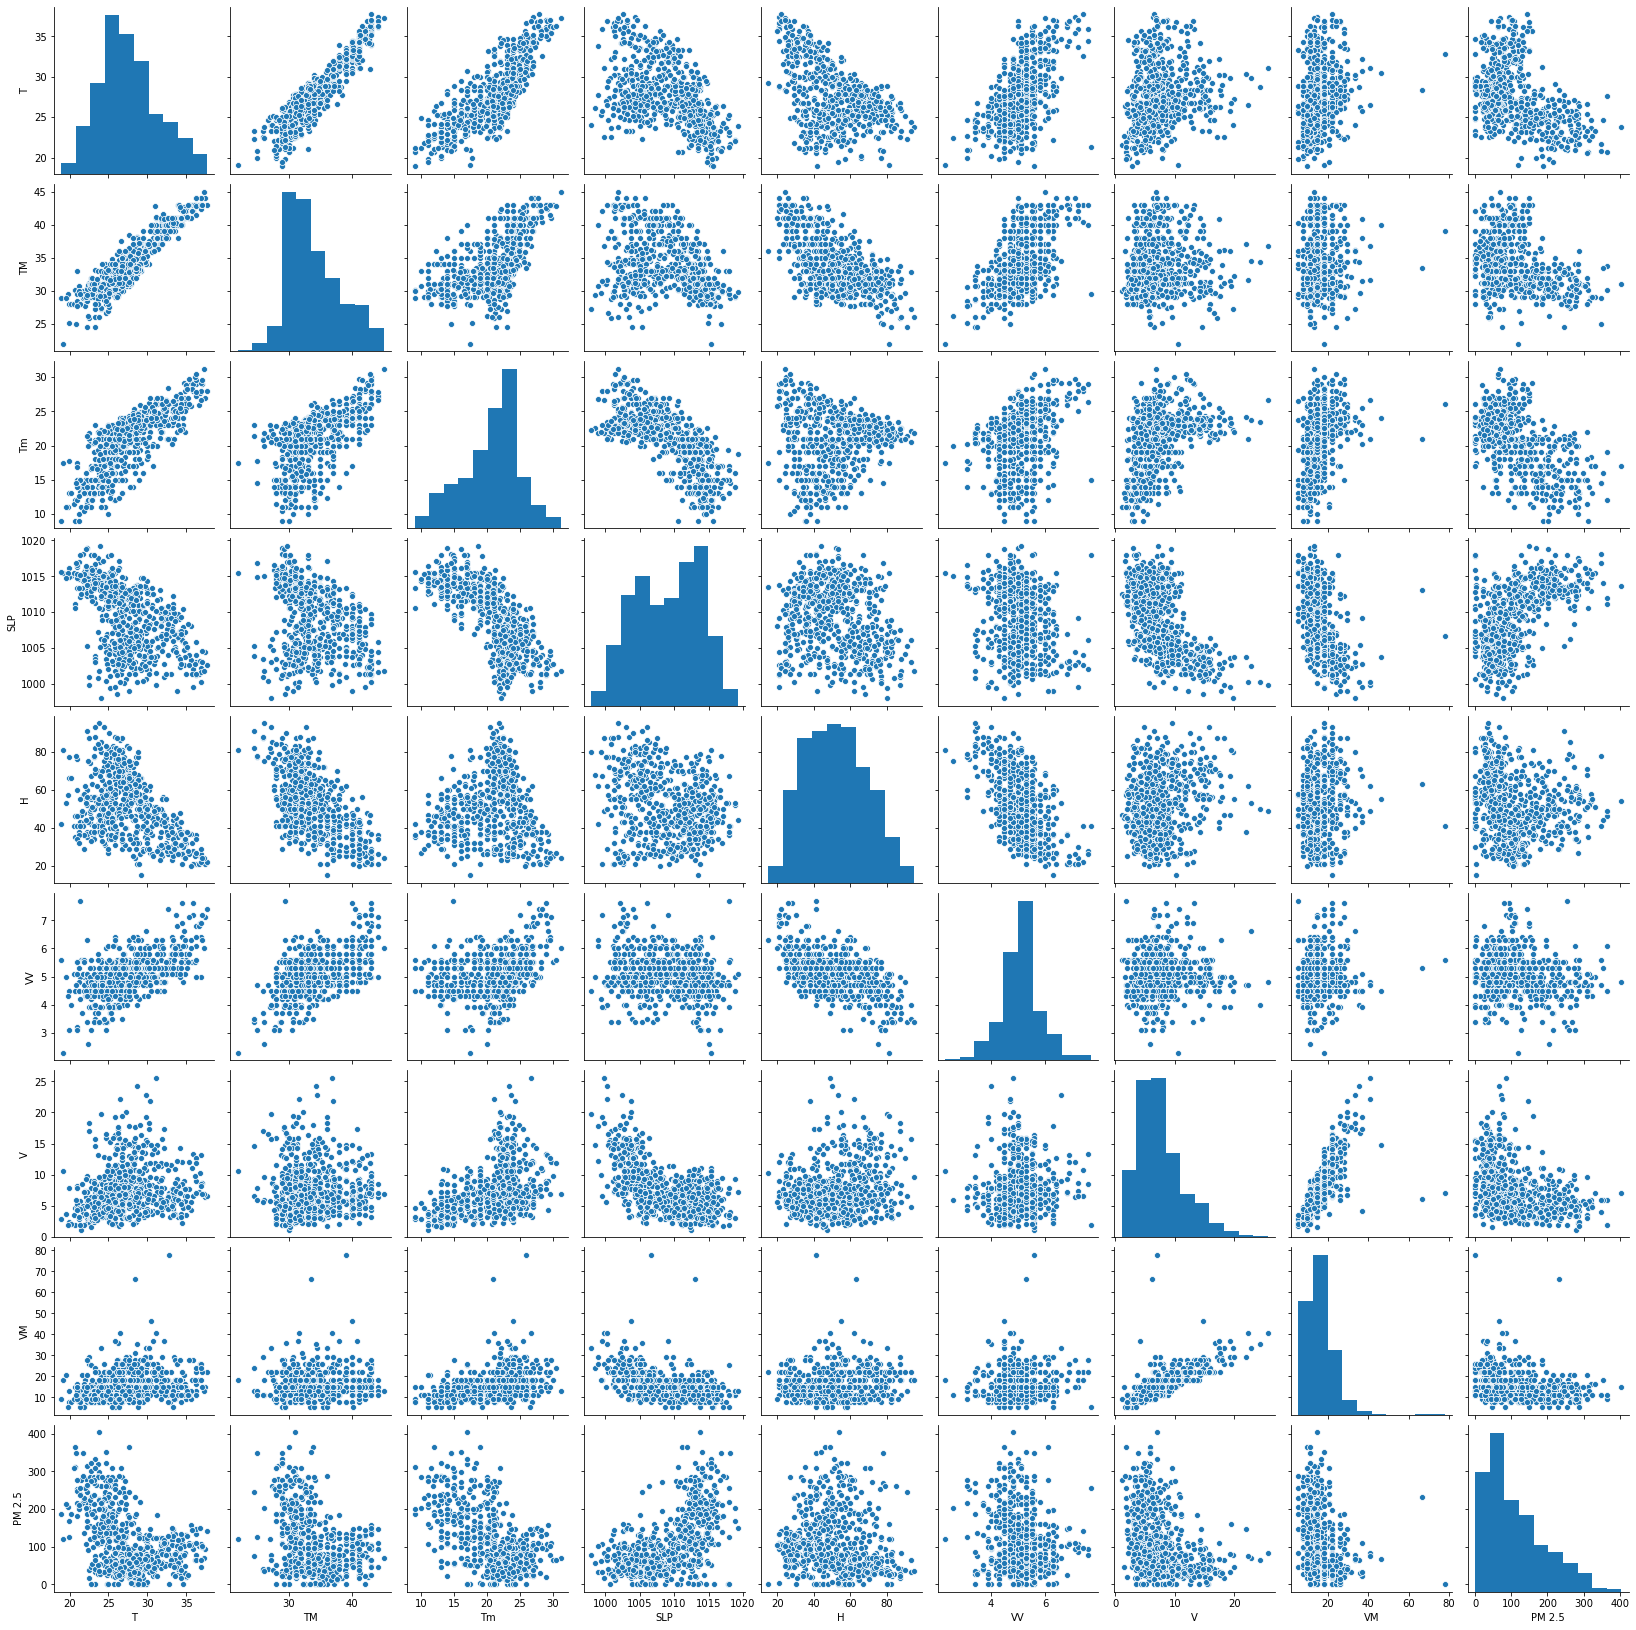

In [14]:
# Multivariate anlaysis 

sns.pairplot(combine_data)


If we observe the pair plot

We compare independent features with dependent feature(PM 2.5)

While comparing the PM 2.5 VS [T,TM,Tm,SLP,H,VV,V,VM] there is no one plot data in organized manner, all in unorder and no linear relation ship between dependent and independent features

So linear algorithms dosen't give good results on this data

In [15]:
# We also check the corelation between dependent and independent feature

combine_data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.920752,0.786809,-0.516597,-0.477952,0.572818,0.160582,0.192456,-0.441826
TM,0.920752,1.000000,0.598095,-0.342692,-0.626362,0.560743,-0.002735,0.074952,-0.316378
Tm,0.786809,0.598095,1.000000,-0.735621,0.058105,0.296954,0.439133,0.377274,-0.591487
SLP,-0.516597,-0.342692,-0.735621,1.000000,-0.250364,-0.187913,-0.610149,-0.506489,0.585046
H,-0.477952,-0.626362,0.058105,-0.250364,1.000000,-0.565165,0.236208,0.145866,-0.153904
VV,0.572818,0.560743,0.296954,-0.187913,-0.565165,1.000000,0.034476,0.081239,-0.147582
V,0.160582,-0.002735,0.439133,-0.610149,0.236208,0.034476,1.000000,0.747435,-0.378281
VM,0.192456,0.074952,0.377274,-0.506489,0.145866,0.081239,0.747435,1.000000,-0.319558
PM 2.5,-0.441826,-0.316378,-0.591487,0.585046,-0.153904,-0.147582,-0.378281,-0.319558,1.000000


If we observe the correlation between PM 2.5 feature and other features all of them negative except SLP

Corelation tells about if PM 2.5 increases what is the behaviour of other features

All of them negative realation so if PM 2.5 increases other features decreases

Corr=negative ======>> X increases then Y decreases

In [16]:
# visualising correlation in heatmap

relation =combine_data.corr()
relation_index=relation.index


In [17]:
relation_index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

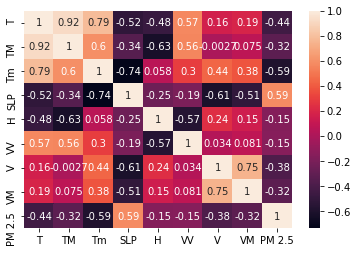

In [18]:
sns.heatmap(combine_data[relation_index].corr(),annot=True)

Upto know actually we are doing feature engineering

We check for null values We check for categorical features We check for outliers We check corelation between dependend and independent features

In [19]:
# Feature selection

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [20]:
# Splitting the data into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(
    combine_data.iloc[:,:-1],
    combine_data.iloc[:,-1],
    test_size=0.3,
    random_state=0)

In [21]:
# size of train data set
X_train.shape

(450, 8)

In [22]:
# size of test data set
X_test.shape

(193, 8)

In [26]:
# feature forward selection method

clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)

# Building step forward feature selection
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=True,
           verbose=0,
           scoring='neg_mean_squared_error',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

In [27]:
# Selected feature's by forward feature selection method
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 3, 4, 6, 7]


SequentialFeatureSelector select the feature [T,Tm,SLP,H,V]

In [28]:
# Feature selection by Extraregressor(model based)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    combine_data.iloc[:,:-1],
    combine_data.iloc[:,-1],
    test_size=0.3,
    random_state=0)

In [30]:
reg= ExtraTreesRegressor()

In [31]:
reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [32]:
reg.feature_importances_

array([0.14435094, 0.10043564, 0.24024429, 0.23517835, 0.08363856,
       0.057944  , 0.07868548, 0.05952273])

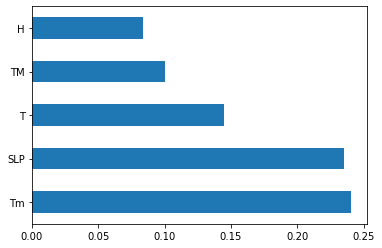

In [33]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Now we check the both feature selection features to predict 

Which gives good results we consider those features


Before Train the data we need to do feature normalization because it makes training less sensitive to the scale of features

## Model Training


In [34]:
# Traning model with all features 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combine_data.iloc[:,:-1], combine_data.iloc[:,-1], test_size=0.3, random_state=0)

In [35]:
X_train


,T,TM,Tm,SLP,H,VV,V,VM
334,28.9,36.0,15.0,1009.2,21.0,5.3,4.8,11.1
46,32.8,39.0,26.0,1006.6,41.0,5.6,7.0,77.8
246,30.3,37.0,24.2,1003.7,38.0,4.7,21.9,29.4
395,28.4,36.6,23.0,1003.1,63.0,4.7,10.7,18.3
516,26.9,31.0,22.9,1003.0,76.0,4.0,7.8,16.5
...,...,...,...,...,...,...,...,...
9,23.7,30.4,17.0,1015.8,46.0,5.1,5.2,14.8
359,33.6,40.0,25.0,1006.9,36.0,5.8,6.1,11.1
192,24.9,30.4,19.0,1008.9,57.0,4.8,4.6,9.4
629,26.1,29.0,22.4,1001.2,87.0,5.0,14.1,22.2


In [36]:
X_test

,T,TM,Tm,SLP,H,VV,V,VM
637,28.4,33.5,20.9,1013.1,63.0,5.3,6.1,66.5
165,20.7,30.1,9.0,1010.5,35.0,4.5,4.6,14.8
467,26.7,33.5,21.0,1010.9,37.0,5.1,5.7,11.1
311,26.0,31.0,20.4,1011.5,63.0,4.8,3.9,9.4
432,26.4,30.9,22.6,1010.0,75.0,4.2,7.6,16.5
...,...,...,...,...,...,...,...,...
249,27.2,32.3,22.0,1003.7,55.0,4.8,20.0,29.4
89,29.7,34.0,22.6,1003.8,56.0,5.5,13.5,27.8
293,22.3,30.3,11.4,1012.6,37.0,5.1,7.2,20.6
441,27.1,33.0,20.0,1010.7,49.0,4.2,6.1,18.3


## Training Model

In [76]:
import xgboost as xgb



In [77]:
# intializing the XGBOOST regressor

xgbst_reg=xgb.XGBRegressor()

In [78]:
# fit the X_train and y_train values to the model
xgbst_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# training data set score
xgbst_reg.score(X_train,y_train)

0.9999002561805529

In [80]:
# test data set score
xgbst_reg.score(X_test,y_test)

0.35092398754513

In [81]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgbst_reg,combine_data.iloc[:,:-1], combine_data.iloc[:,-1],cv=5)

In [82]:
score.mean()

0.2659876868345715

# Model Evaluation

In [83]:
prediction=xgbst_reg.predict(X_test)

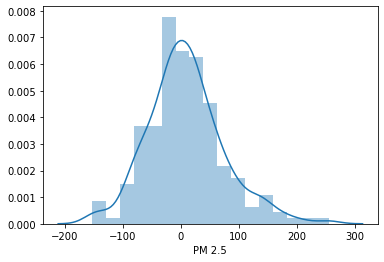

In [84]:
sns.distplot(y_test-prediction)

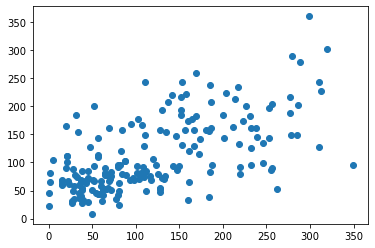

In [85]:
plt.scatter(y_test,prediction)


# Hyper parameter tuning

In [86]:
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV


In [135]:
# Hyparameter ranges 

from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'learning_rate': [0.001,0.002,0.003,0.005,0.01,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6],
               'max_depth': randint(5,40),
               'subsample': [0.5,0.6,0.7,0.8],
               'min_child_weight': randint(1,10)  }


In [136]:
# Model for tuning

base_learner=xgb.XGBRegressor()


In [137]:
# Tuning 

tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [138]:
tuned_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001511E1B46D8>,
                                        'min_child_weight': <

In [139]:
tuned_model.best_params_

{'learning_rate': 0.005,
 'max_depth': 5,
 'min_child_weight': 8,
 'n_estimators': 611,
 'subsample': 0.6}

In [140]:
tuned_model.best_score_

-3656.933662545248

## Model Evaluation 

In [141]:
# Predicting X_test values using tuned_model
prediction=tuned_model.predict(X_test)

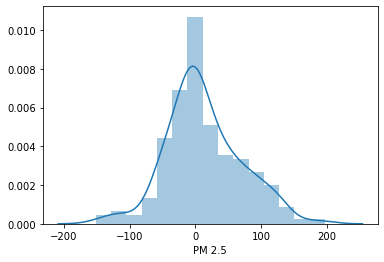

In [142]:
sns.distplot(y_test-prediction)

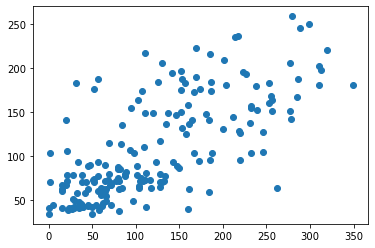

In [143]:
# checking difference between labled y and predicted y
plt.scatter(y_test,prediction)

We are getting nearly bell shape curve that means our model working good, but this is not the best model for the data

In [144]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 43.71873411256285
MSE: 3458.1210809592762
RMSE: 58.80579121956677
